In [732]:
import pandas as pd
import numpy as np
import seaborn as sns

In [733]:
df = pd.read_csv('diabetes.csv')

In [734]:
df .sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
476,2,105,80,45,191,33.7,0.711,29,1
179,5,130,82,0,0,39.1,0.956,37,1
174,2,75,64,24,55,29.7,0.370,33,0
426,0,94,0,0,0,0.0,0.256,25,0
662,8,167,106,46,231,37.6,0.165,43,1


In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [736]:
df=df.drop(["SkinThickness"],axis=1)

In [737]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [738]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [739]:
df.duplicated().sum()

0

In [740]:
df.corr()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.088933,0.281805,0.041265,0.239528,0.065068
Insulin,-0.073535,0.331357,0.088933,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

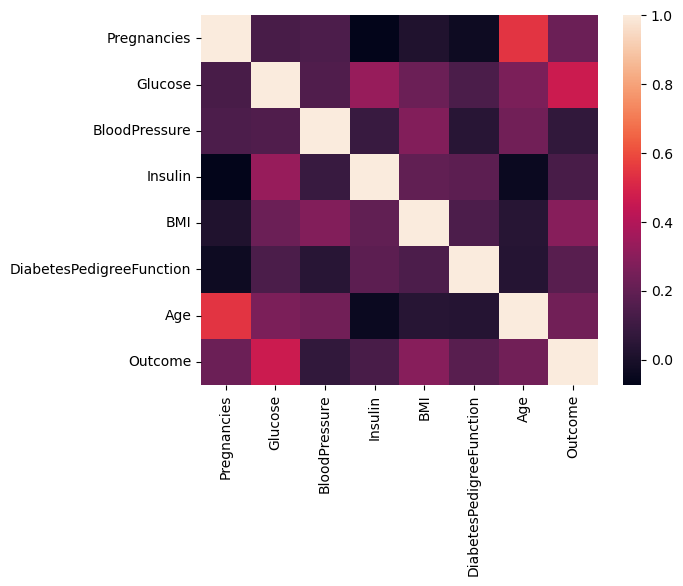

In [741]:
corr = df.corr()

sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [742]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [743]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [744]:
y = df['Outcome']
y.shape

(768,)

In [745]:
x = df[['Pregnancies', 'Glucose',  'BMI',
       'DiabetesPedigreeFunction', 'Age']]
x.shape

(768, 5)

In [746]:
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state = 2529)
y_test.shape

(192,)

In [747]:
model = LogisticRegression(max_iter=1000)

In [748]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [749]:
y_predict = model.predict(x_test)

In [750]:
from sklearn.metrics import accuracy_score

In [751]:
accuracy_score(y_test,y_predict)

0.78125

# SVM 

In [752]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

In [753]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled, x_test_scaled

(array([[-0.86122026, -0.4012767 ,  0.45402246, -0.16433707, -0.80291   ],
        [ 1.72993808,  0.04358105, -0.59024756,  0.14109306,  1.00296567],
        [ 0.86621863, -1.19566554, -0.36553123,  0.94402794,  0.22901895],
        ...,
        [-0.28540729,  2.29964536,  0.37471081, -0.71222204, -0.71691592],
        [-0.86122026, -1.06856332,  0.73161323, -0.20841976, -0.80291   ],
        [-0.28540729, -1.89472772,  0.30861778, -0.70592451,  1.08895975]]),
 array([[-5.73313775e-01, -9.41461108e-01, -6.29903383e-01,
          1.82026998e-01, -9.74898155e-01],
        [-2.85407293e-01,  2.66009930e-01,  5.72989932e-01,
          1.57692954e+00, -1.14957363e-01],
        [ 1.15412511e+00,  1.98188983e+00, -1.15864770e+00,
          6.44895337e-01, -1.14957363e-01],
        [-5.73313775e-01, -8.35211601e-02,  1.43219944e+00,
          7.11019385e-01, -1.06089223e+00],
        [ 2.90405670e-01,  3.61336591e-01, -6.95996422e-01,
         -8.85404070e-01,  3.06682357e+00],
        [ 3.169

In [754]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [755]:
svm = GridSearchCV(SVC(), params_grid, cv=8)
svm = svm.fit(x_train_scaled, y_train)

In [756]:
print('Best score for training data:', svm.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm.best_estimator_.C,"\n") 
print('Best Kernel:',svm.best_estimator_.kernel,"\n")
print('Best Gamma:',svm.best_estimator_.gamma,"\n")

model = svm.best_estimator_
y_pred = model.predict(x_test_scaled)

Best score for training data: 0.765625 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.001 



In [757]:
print(confusion_matrix(y_test,y_pred))


print("Training set score for SVM: %f" % model.score(x_train_scaled , y_train))
print("Testing  set score for SVM: %f" % model.score(x_test_scaled  , y_test ))

svm.score

[[110   8]
 [ 35  39]]
Training set score for SVM: 0.779514
Testing  set score for SVM: 0.776042


<bound method BaseSearchCV.score of GridSearchCV(cv=8, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [758]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7760416666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       118
           1       0.83      0.53      0.64        74

    accuracy                           0.78       192
   macro avg       0.79      0.73      0.74       192
weighted avg       0.79      0.78      0.76       192

